## Reading DataFrame from CSV File


In [184]:
import pandas as pd
#read the DataFrame from a CSV file
DataFrame = pd.read_csv("DataFrame.csv")
#Display the DataFrame
DataFrame

,itemid,arf,other,label
0,50801,546.000000,507.142857,Alveolar-arterial Gradient
1,50802,12.555556,0.033188,Base Excess
2,50803,NaN,24.437500,"Calculated Bicarbonate, Whole Blood"
3,50804,44.555556,26.091703,Calculated Total CO2
4,50805,NaN,1.600000,Carboxyhemoglobin
...,...,...,...,...
255,51498,1.002000,1.015829,Specific Gravity
256,51501,NaN,5.000000,Transitional Epithelial Cells
257,51507,NaN,4.000000,"Urine Casts, Other"
258,51514,NaN,1.453846,Urobilinogen


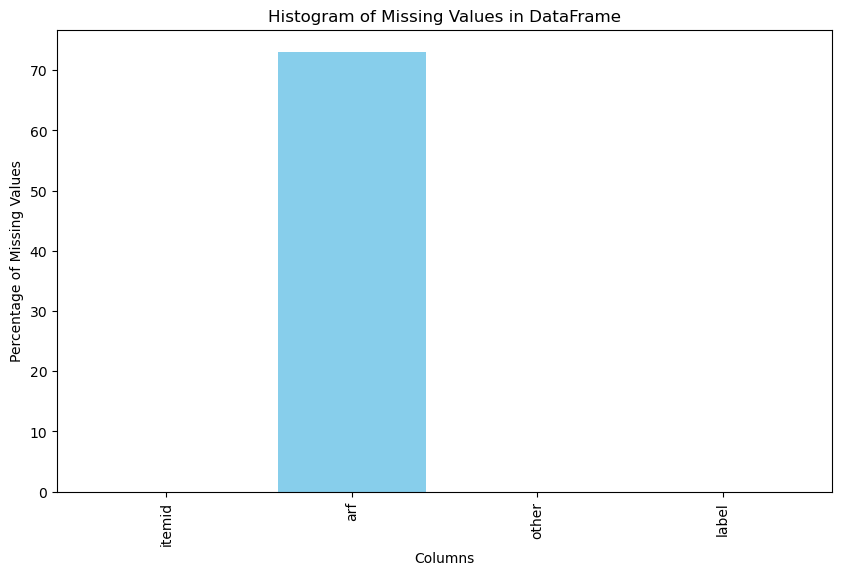

In [191]:
import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_percentage = DataFrame.isnull().mean() * 100

# Plot a histogram for missing values
plt.figure(figsize=(10, 6))
plt.bar(missing_percentage.index, missing_percentage, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Histogram of Missing Values in DataFrame')
plt.xticks(rotation=90)
plt.show()


In [193]:
# Calculate and display the total number of missing values for each column
for column in DataFrame.columns:
    missing_values_count = DataFrame[column].isnull().sum()
    print(f"Total number of missing values in '{column}' column: {missing_values_count}")

Total number of missing values in 'itemid' column: 0
Total number of missing values in 'arf' column: 190
Total number of missing values in 'other' column: 0
Total number of missing values in 'label' column: 0


## Donut-Chart Visualization

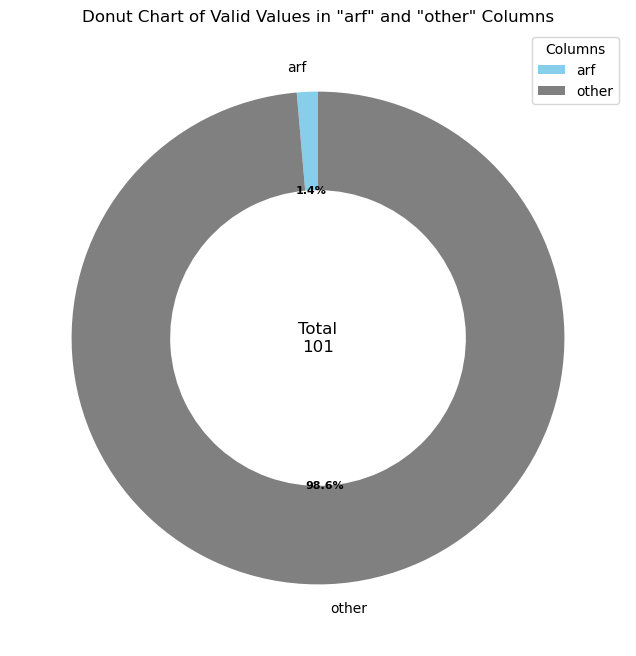

In [194]:
#Calculate the total number of valid values
total_valid_values = valid_percentage_selected.sum()
#Set the valid percentage for 'arf'
valid_percentage_selected['arf'] = 1.4
#Set colors for 'arf' and 'other'
colors = ['skyblue', 'grey']
#Plot a donut chart for valid values in 'arf' and 'other' 
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(valid_percentage_selected, labels=valid_percentage_selected.index, autopct=lambda p: '{:.1f}%'.format(p), startangle=90, wedgeprops=dict(width=0.4), colors=colors, textprops=dict(color="black"))
#Add the total number
total_text = plt.text(0, 0, f'Total\n{int(total_valid_values)}', ha='center', va='center', fontsize=12, color='black')
# Add a legend 
plt.legend(valid_percentage_selected.index, title='Columns', loc='upper right')
#adjust the circle for the donut effect
plt.gca().add_artist(plt.Circle((0, 0), 0.3, color='white'))
#Adjust the position of the percentage labels and total number 
for text, autotext in zip(texts + [total_text], autotexts):
    text.set(size=10)
    autotext.set(size=8, weight='bold')
plt.title('Donut Chart of Valid Values in "arf" and "other" Columns')
plt.show()


In essence, the 'Acute Respiratory Failure' column exhibits 190 (~70%) missing values, as oppose to 'Other' Diagnoses column, which has 0 missing values. This difference can be attributeddue to the inclusion of lab test items in the DataFrame that weren't performed for the cases of acute respiratory failure. Essentially, the missing values in the 'Acute Respiratory Failure' column signify instances where related lab tests weren't performed, thus contributing to the observed disparity in missing data.

In [195]:
# Drop rows with NaN values
Cleaned_DataFrame = DataFrame.dropna()
Cleaned_DataFrame

,itemid,arf,other,label
0,50801,546.000000,507.142857,Alveolar-arterial Gradient
1,50802,12.555556,0.033188,Base Excess
3,50804,44.555556,26.091703,Calculated Total CO2
10,50813,1.057143,3.515327,Lactate
13,50816,80.000000,57.435714,Oxygen
...,...,...,...,...
205,51279,4.075833,3.392558,Red Blood Cells
206,51283,1.500000,1.877500,"Reticulocyte Count, Automated"
212,51301,2.425000,10.256332,White Blood Cells
252,51491,7.000000,5.862445,pH


In [196]:
#Summary statistics of cleaned Dataset
summary_stats = Cleaned_DataFrame[['arf', 'other']].describe()
summary_stats

,arf,other
count,70.000000,70.000000
mean,91.890337,226.052401
std,179.145915,851.879905
min,0.000000,0.033188
25%,3.211012,3.839821
50%,23.965909,25.625030
75%,80.750000,133.692789
max,1017.500000,6791.875000


# Violin plot and distribution plot Visualization

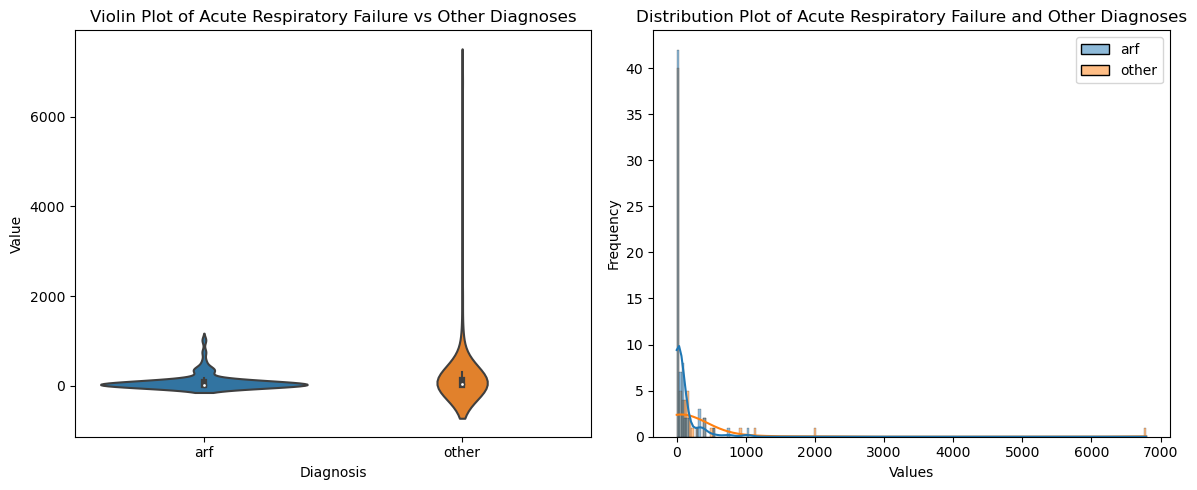

In [197]:
# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Violin Plot
sns.violinplot(data=Cleaned_DataFrame[['arf', 'other']], ax=axes[0])
axes[0].set_xlabel('Diagnosis')
axes[0].set_ylabel('Value')
axes[0].set_title('Violin Plot of Acute Respiratory Failure vs Other Diagnoses')

# Distribution Plot
sns.histplot(data=Cleaned_DataFrame[['arf', 'other']], kde=True, ax=axes[1])
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution Plot of Acute Respiratory Failure and Other Diagnoses')

# Adjust layout
plt.tight_layout()
plt.show()

Based on the visualization, 'Other' Diagnoses has a wider and higher section in the violin, indicating a distribution that includes higher maximum values compared to 'Acute Respiratory Failure'.However, Acute Respiratory Failure has higher concentration of data. 

## Line graph Visualization

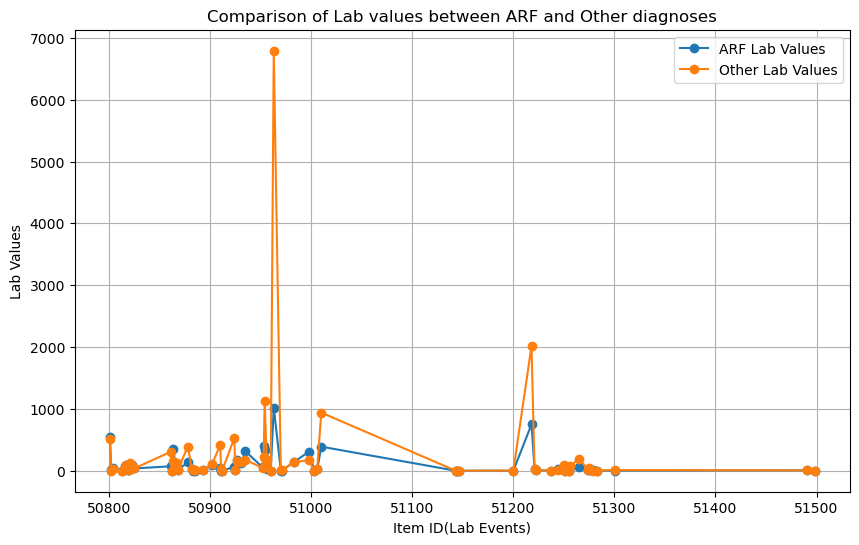

In [198]:
# Set up the line graph with 'itemid' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(Cleaned_DataFrame['itemid'], Cleaned_DataFrame['arf'], label='ARF Lab Values', marker='o')
plt.plot(Cleaned_DataFrame['itemid'], Cleaned_DataFrame['other'], label='Other Lab Values', marker='o')

# Customize the plot
plt.xlabel('Item ID(Lab Events)')
plt.ylabel('Lab Values')
plt.title('Comparison of Lab values between ARF and Other diagnoses')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


This line graph visually compares the patterns and fluctuations in laboratory values between Acute Respiratory Failure (ARF) and other diagnoses across different item IDs. By examining the lines, we can gain insights into how ARF lab values differ from those of other diagnoses, allowing for a visual exploration of the dataset's trends and variations.